<h1 style='text-align: center'>Welcome to Project 1! &#128522;</h1>

<p style= 'text-align: center'>The dataset that I will be using is from Kaggle, which is titled “Tech Hiring and Layoffs: Workforce Data (2000-2025). As you can see from the title, it is about various tech companies that have hired and laid-off employees in the last 25 years. So based on my dataset, I wanted to know if for the tech companies listed, if companies had more layoffs in the 2008 recession or during the COVID-19 pandemic, in the years 2020-2021.

This dataset contains 532 rows of information, and a total of 16 columns. Each row represents a year in a specific company, and some key features include company, year, layoffs, and unemployment_rate.</p>

<p style='text-align: center'> Research Question: For most companies in the dataset, during the 2008 recession and the COVID-19 pandemic most prominent in 2020-2021, which company had more layoffs to occur during which year? &#128526; </p>

Link to dataset: https://www.kaggle.com/datasets/aryanmdev/tech-hiring-and-layoffs-workforce-data-20002025

### Let's Begin!

Let's do our importing of libraries that will be used throughout the project!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics # may or may not be used!

Let's bring in the dataset and see what we are working with!

In [3]:
dataset = pd.read_csv(r"C:\Users\marih\Downloads\Studio II\tech_employment_2000_2025.csv")

In [4]:
dataset.head(10) # allows us to see the first 10 observations of our dataset!

,company,year,employees_start,employees_end,new_hires,layoffs,net_change,hiring_rate_pct,attrition_rate_pct,revenue_billions_usd,stock_price_change_pct,gdp_growth_us_pct,unemployment_rate_us_pct,is_estimated,confidence_level,data_quality_score
0,AMD,2001,13387,14400,2083,1070,1013,15.6,8.0,3.89,25.1,1.0,4.7,False,Medium,95
1,AMD,2002,14400,12500,0,1900,-1900,0.0,13.2,2.70,42.8,1.7,5.8,False,Medium,95
2,AMD,2003,12500,12000,0,500,-500,0.0,4.0,3.52,-1.8,2.8,6.0,False,Medium,95
3,AMD,2004,12000,11700,60,360,-300,0.5,3.0,5.00,-18.6,3.8,5.5,False,Medium,95
4,AMD,2005,11700,9860,0,1840,-1840,0.0,15.7,5.85,15.2,3.5,5.1,False,Medium,95
5,AMD,2006,9860,16000,6435,295,6140,65.3,3.0,5.65,47.2,2.8,4.6,False,Medium,95
6,AMD,2007,16000,16420,900,480,420,5.6,3.0,6.01,-8.1,2.0,4.6,False,Medium,95
7,AMD,2008,16420,10300,0,6120,-6120,0.0,37.3,5.81,-19.7,0.1,5.8,False,Medium,95
8,AMD,2009,10300,10400,924,824,100,9.0,8.0,5.40,35.6,-2.6,9.3,False,Medium,95
9,AMD,2010,10400,11100,1012,312,700,9.7,3.0,6.49,0.0,2.7,9.6,False,High,95


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company                   532 non-null    object 
 1   year                      532 non-null    int64  
 2   employees_start           532 non-null    int64  
 3   employees_end             532 non-null    int64  
 4   new_hires                 532 non-null    int64  
 5   layoffs                   532 non-null    int64  
 6   net_change                532 non-null    int64  
 7   hiring_rate_pct           532 non-null    float64
 8   attrition_rate_pct        532 non-null    float64
 9   revenue_billions_usd      532 non-null    float64
 10  stock_price_change_pct    532 non-null    float64
 11  gdp_growth_us_pct         532 non-null    float64
 12  unemployment_rate_us_pct  532 non-null    float64
 13  is_estimated              532 non-null    bool   
 14  confidence

From above, you can see that there are actually no null values listed in the dataset! Which works wonderfully for our preprocessing steps and makes my life easier.

### PRE-PROCESSING!!! 

In [6]:
dataset

,company,year,employees_start,employees_end,new_hires,layoffs,net_change,hiring_rate_pct,attrition_rate_pct,revenue_billions_usd,stock_price_change_pct,gdp_growth_us_pct,unemployment_rate_us_pct,is_estimated,confidence_level,data_quality_score
0,AMD,2001,13387,14400,2083,1070,1013,15.6,8.0,3.89,25.1,1.0,4.7,False,Medium,95
1,AMD,2002,14400,12500,0,1900,-1900,0.0,13.2,2.70,42.8,1.7,5.8,False,Medium,95
2,AMD,2003,12500,12000,0,500,-500,0.0,4.0,3.52,-1.8,2.8,6.0,False,Medium,95
3,AMD,2004,12000,11700,60,360,-300,0.5,3.0,5.00,-18.6,3.8,5.5,False,Medium,95
4,AMD,2005,11700,9860,0,1840,-1840,0.0,15.7,5.85,15.2,3.5,5.1,False,Medium,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,X (Twitter),2021,5800,7500,1874,174,1700,32.3,3.0,5.08,36.4,5.8,5.4,False,High,95
528,X (Twitter),2022,7500,8000,950,450,500,12.7,6.0,4.40,-45.8,1.9,3.6,False,High,95
529,X (Twitter),2023,8000,1500,0,6500,-6500,0.0,81.2,3.40,22.0,2.5,3.7,False,High,95
530,X (Twitter),2024,1500,1600,145,45,100,9.7,3.0,3.80,46.0,2.8,4.1,True,Medium,85


From our dataset above, we can see that there are a lot of features that we can use and focus on, but for now let's see if there is any data cleaning that we need to do!

Some other things to consider would be to make sure that the datavalues that are given actually make sense, and from what Daniel the TA was telling us before, we can always one-hot encode things to make categorical values, numerical, if need be. But there doesn't seem to be any categorical or numerical features that need any cleaning or changing, so we can move on!

Some features that we will be focusing on today will be:
- company
- year
- layoffs

Let's try to condense our dataset into only the values that we are going to be focusing on for the project!

In [7]:
new_data = dataset[['company', 'year', 'layoffs', 'revenue_billions_usd']] # taking our original dataset and making it into a subset!

In [8]:
new_data # let's see what our new dataset contains

,company,year,layoffs,revenue_billions_usd
0,AMD,2001,1070,3.89
1,AMD,2002,1900,2.70
2,AMD,2003,500,3.52
3,AMD,2004,360,5.00
4,AMD,2005,1840,5.85
...,...,...,...,...
527,X (Twitter),2021,174,5.08
528,X (Twitter),2022,450,4.40
529,X (Twitter),2023,6500,3.40
530,X (Twitter),2024,45,3.80


Now that we have exactly the data that we wanted, let's see what we can do with it!

In [9]:
years = new_data[(new_data["year"] == 2020) | (new_data["year"] == 2008) | (new_data["year"] == 2021)]

In [10]:
years

,company,year,layoffs,revenue_billions_usd
7,AMD,2008,6120,5.81
19,AMD,2020,342,9.76
20,AMD,2021,417,16.43
32,Adobe,2008,520,3.58
44,Adobe,2020,675,12.87
...,...,...,...,...
506,Uber,2020,3700,11.14
507,Uber,2021,696,17.46
514,X (Twitter),2008,1,0.00
526,X (Twitter),2020,147,3.72


### VISUALIZATIONS!!!

<Axes: xlabel='company', ylabel='layoffs'>

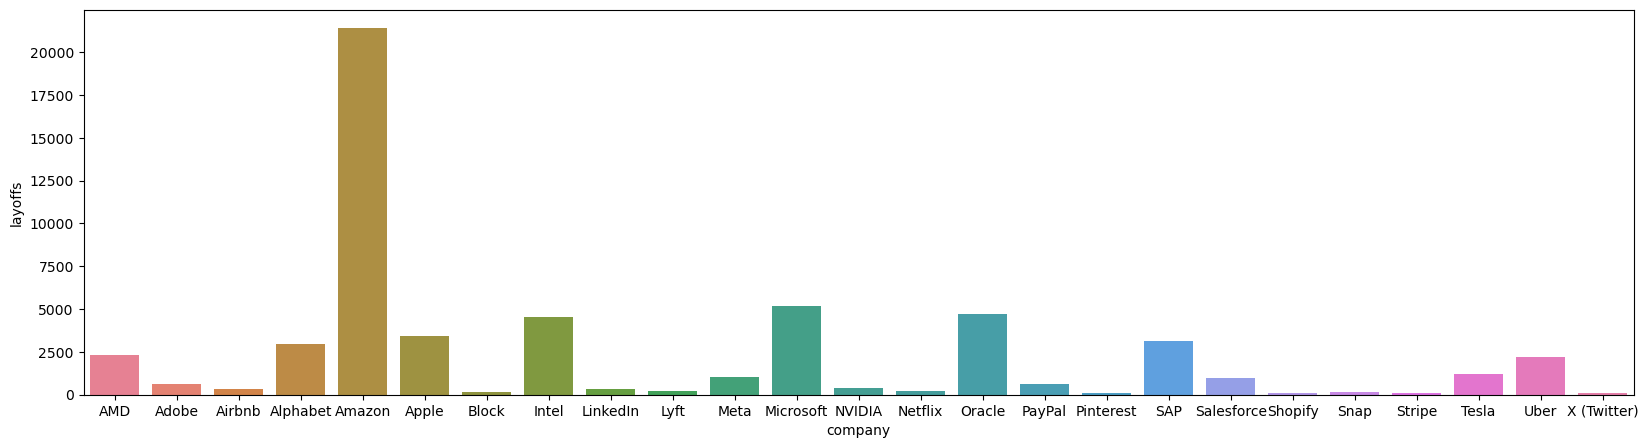

In [38]:
plt.figure(figsize=(20, 5))
sns.barplot(x=years["company"], y=years["layoffs"], errorbar=None, hue=years['company'])

From the simple bar graph above, you can see that we have Amazon as a leading company who has the most layoffs but we're not sure what year that occurred, so let's take a deeper look.

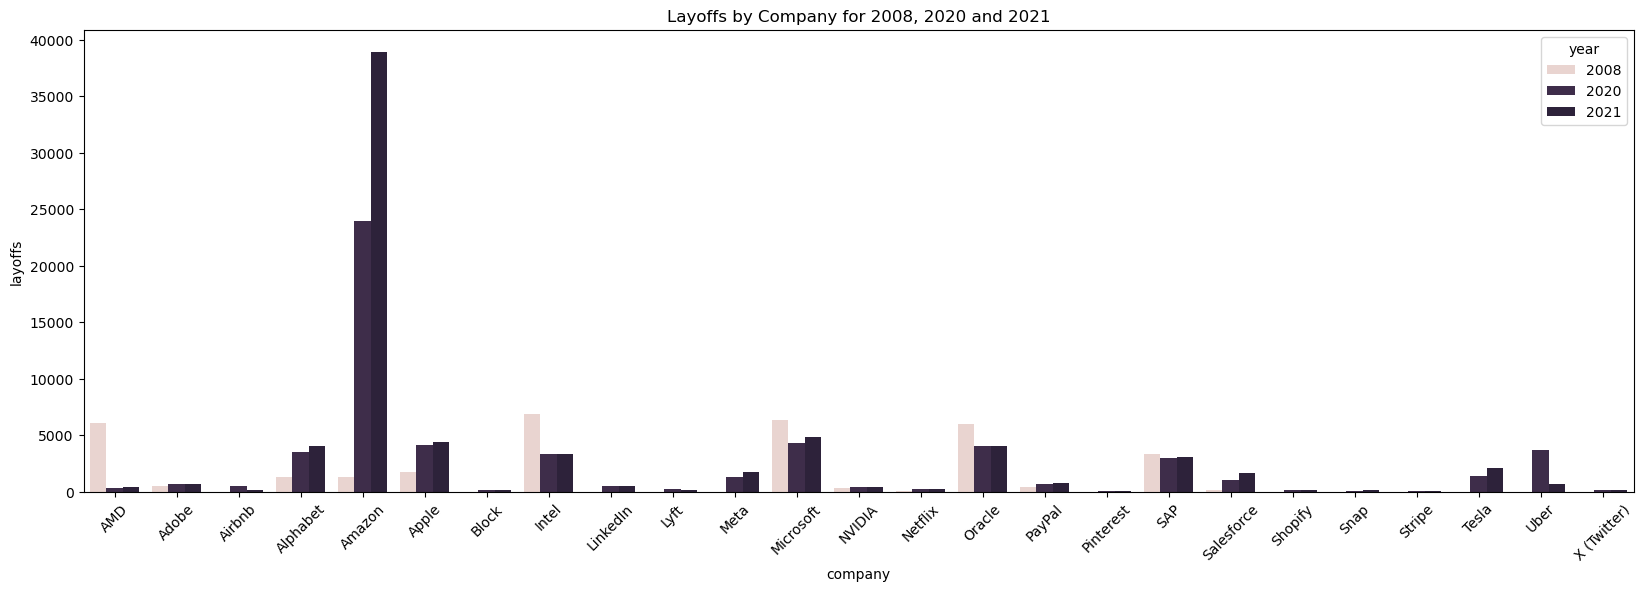

In [40]:
# this was generated using copilot built into VS Code!
plt.figure(figsize=(20, 6))
sns.barplot(data=years, x='company', y='layoffs', hue="year", errorbar=None)
plt.xticks(rotation=45)
plt.title("Layoffs by Company for 2008, 2020 and 2021")
plt.show()

As you can see from the chart above, Amazon actually has the most layoffs in the year 2021, during the ending season of COVID-19 vs 2008, where they had less than 5000 layoffs, almost 8x the amount in just less than 15 years!!

# Analysis

From the graph above, you can see that Amazon is the leading company for most layoffs, but it's not really fair to say that overtime, we could see this happening because of the data that I decided to use. Instead of using data that comes from 2008-2021, instead I divided it and created this huge gap of time, which can cause disparities. 
A disparity would be technological advances made throughout the almost 15 year gap. There could be lack of information such as just not enough reportings of the layoffs that occurred during 2008 vs more recently because of reporting metrics. 



Back to our original question of: For the companies in the dataset, during the 2008 recession and the COVID-19 pandemic most prominent in 2020-2021, which company had more layoffs to occur during which year?
As we have found, Amazon seems to be the company that has been laying off the most employees throughout 2020 and 2021, with its amounts almost doubling in just one year. 

For further exploration, I would want to see if there is more correlation between features such as the unemployment rate and the revenue amount. If companies arent making enough money, how will they be able to take on more employees? Do companies with smaller revenue have a higher unemployment rate than a larger company like Amazon?